<a href="https://colab.research.google.com/github/alex-kondr/Data_Science_HW_3/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Повтор лекції: залежність ціни квартири від площі

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.shape

(545, 13)

In [ ]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


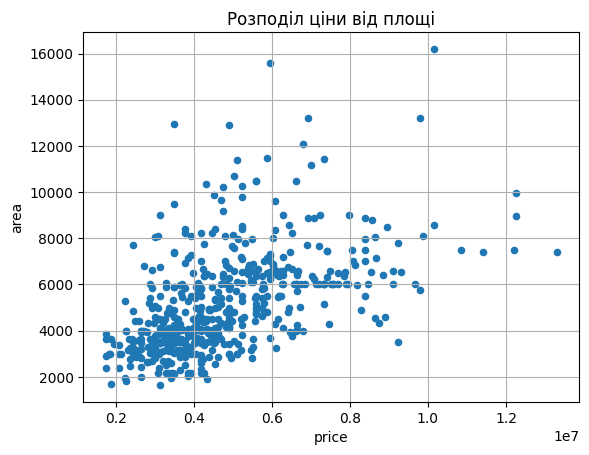

In [ ]:
df.plot(x='price', y='area', kind='scatter')
plt.title('Розподіл ціни від площі')
plt.grid()

Лінійна регресія з однією змінною

In [ ]:
def h(w_0, w_1, x):
  return w_0 + w_1 * x

Функція втрат

In [ ]:
def loss_function(w_0, w_1, df):
  n = df.area.shape[0]
  cost = 0

  for x, y in zip(df.area, df.price):
    cost = cost + (h(w_0, w_1, x) - y)**2

  return cost/(2*n)

Один крок наближення коефіцієнтів

In [ ]:
def grad_step(w_0, w_1, grad_0, grad_1, learning_rate=0.001):

  w_0 = w_0 - learning_rate * grad_0
  w_1 = w_1 - learning_rate * grad_1

  return w_0, w_1

In [ ]:
def grad_w_0(w_0, w_1, df):

  n = df.area.shape[0]
  cost = 0

  for x, y in zip(df.area, df.price):
    cost = cost + h(w_0, w_1, x) - y

  return cost/n


def grad_w_1(w_0, w_1, df):

  n = df.area.shape[0]
  cost = 0

  for x, y in zip(df.area, df.price):
    cost = cost + (h(w_0, w_1, x) - y)*x

  return cost/n

Знаходження коефіцієнтів

In [ ]:
def grad_descent(w_0, w_1, df, num_iter, learning_rate=0.1, epsilon=0.0000001):

  loss = loss_function(w_0, w_1, df)
  loss_history = [loss]

  for i in range(num_iter):

    grad_0 = grad_w_0(w_0, w_1, df)
    grad_1 = grad_w_1(w_0, w_1, df)

    w_0, w_1 = grad_step(w_0, w_1, grad_0, grad_1, learning_rate=learning_rate)
    loss = loss_function(w_0, w_1, df)

    if abs(loss - loss_history[-1]) < epsilon:
      loss_history.append(loss)
      break

    loss_history.append(loss)

  return w_0, w_1, loss_history

Нормалізація даних

In [ ]:
def normalization(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)
  result = []

  for x in data:
    norm_x = (x - mean)/value_range
    result.append(norm_x)

  return result

In [ ]:
norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm.head()

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977


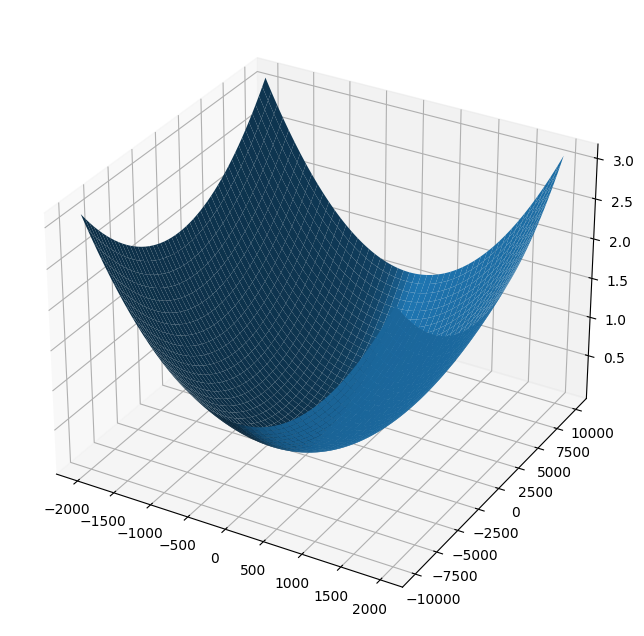

In [ ]:
from matplotlib import projections
grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, norm)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w_0, w_1, z)
plt.show()

In [ ]:
w_0, w_1, loss_history = grad_descent(0., 0., norm, 10000)

In [ ]:
w_0

2.9986207197215346e-17

In [ ]:
w_1

0.5370185545993247

In [ ]:
len(loss_history)

1153

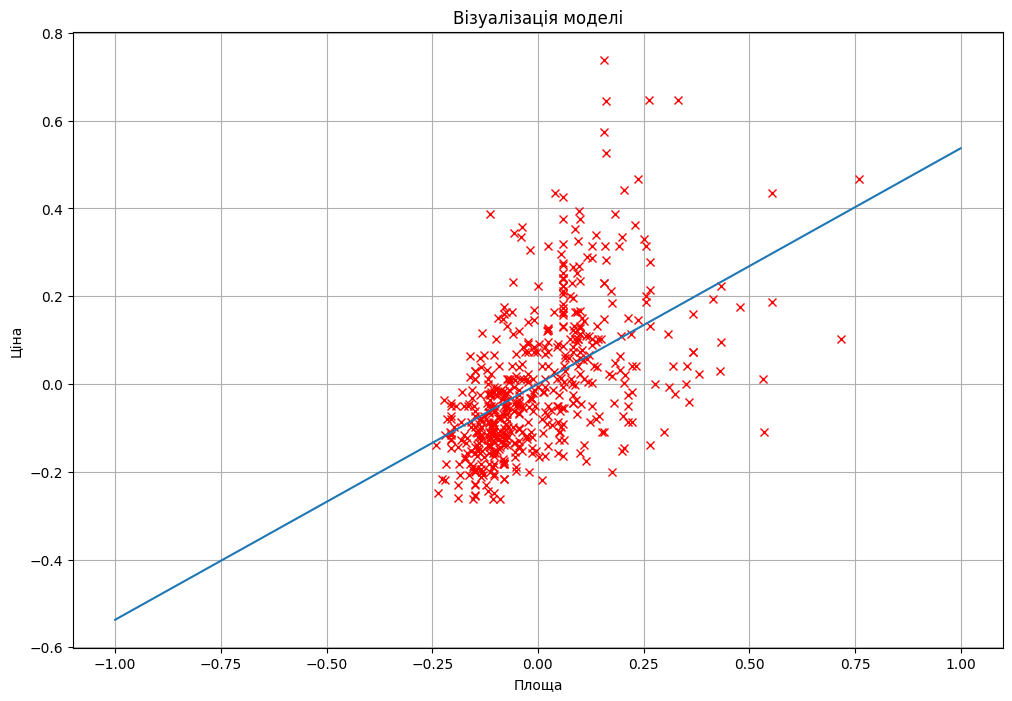

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-1, 1, 500)
plt.plot(x, h(w_0, w_1, x))
plt.title('Візуалізація моделі')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.grid()

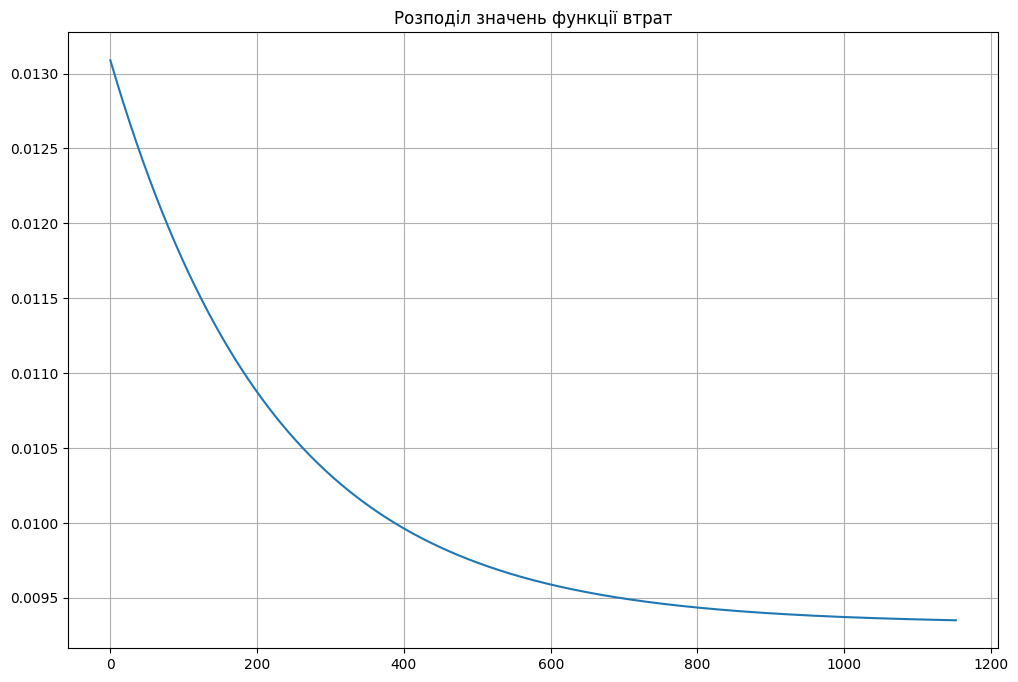

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss_history)
plt.title('Розподіл значень функції втрат')
plt.grid()

Знаходження коефіцієнтів за допомогою модулю sklearn

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [ ]:
X = np.array([norm.area]).T
Y = np.array(norm.price)

In [ ]:
model.fit(X, Y)

LinearRegression()

In [ ]:
model.coef_

array([0.58196837])

In [ ]:
model.intercept_

6.353102831524844e-17

Коефіцієнти знайдені за допомогою градієнтного спуску:


1.   w_0 = 2.9986207197215346e-17
2.   w_1 = 0.5370185545993247

Коефіцієнти знайдені за допомогою градієнтного спуску:

1.   w_0 = 6.353102831524844e-17
2.   w_1 = 0.58196837



*************************************************************************

Лінійна регресія з трьома змінними

+ price, bedrooms,	bathrooms

Порядок розташування коефіцієнів у векторі W

1.   W = (w_1, w_2, w_3, w_0)



Порядок розташування змінних у векторі X

1.   X = (x_1, x_2, x_3, x_0)
2.   де x_0 = 1




Лінійна модель

In [ ]:
def h(W: tuple|list, X: tuple|list):
  sum = 0

  for w, x in zip(W, X):
    sum += w*x

  return sum

Вигляд матриці X_matrix


1.   X_matrix = [[x_0_1, x_0_2, x_0_3, 1], [x_1_1, x_1_2, x_1_3, 1], ...]
2.   X_matrix = [[area_i, bedrooms_i, bathrooms_i, 1], ...]



In [ ]:
X_matrix = df[['area', 'bedrooms', 'bathrooms']]

In [ ]:
X_matrix['area'].std()

2170.141022508803

Нормалізація даних (замість середнього значення використано стандартне відхилення)

In [ ]:
def normalization(column_data):
  result = []
  mean = column_data.mean()
  std = column_data.std()

  for x in column_data:
    x_norm = (x - mean) / std
    result.append(x_norm)

  return result

Нормалізація даних площі

In [ ]:
X_matrix['area'] = normalization(X_matrix['area'])
X_matrix.head()

<ipython-input-19-a37f53342ac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_matrix['area'] = normalization(X_matrix['area'])


,area,bedrooms,bathrooms
0,1.045766,4,2
1,1.755397,4,4
2,2.216196,3,2
3,1.082630,4,2
4,1.045766,4,1


In [ ]:
X_matrix['ones'] = 1
X_matrix.shape

<ipython-input-20-bbd35b114aca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_matrix['ones'] = 1


(545, 4)

In [ ]:
X_matrix.tail()

,area,bedrooms,bathrooms,ones
540,-0.990968,2,1,1
541,-1.267448,3,1,1
542,-0.705273,2,1,1
543,-1.032440,3,1,1
544,-0.599289,3,1,1


Нормалізація даних ціни

In [ ]:
price = normalization(df['price'])

Функція втрат

In [ ]:
def loss_function(W: tuple, X_matrix, Y):
  n = len(Y)
  result = 0

  for i in range(n):
    result += (h(W, X_matrix.iloc[i]) - Y[i])**2

  return result/(2 * n)

Одни крок обрахунку вектора коефіцієнтів

In [ ]:
def W_new_coef(W: tuple|list, X_matrix, Y: tuple|list, learning_rate=0.1):
  W_new = []
  n = len(Y)

  for j in range(len(W)):
    result = 0
    for i in range(n):
       result += (h(W, X_matrix.iloc[i]) - Y[i]) * X_matrix.iloc[i][j]
    w_new = W[j] - learning_rate * (result / n)
    W_new.append(w_new)

  return W_new

Знаходження коефіцієнтів

In [ ]:
def grad_descent(W: tuple, X_matrix, Y, num_iter, learning_rate=0.1, epsilon=0.0000001):

  loss = loss_function(W, X_matrix, Y)
  loss_history = [loss]

  for i in range(num_iter):

    W = W_new_coef(W, X_matrix, Y, learning_rate)
    loss = loss_function(W, X_matrix, Y)

    if abs(loss - loss_history[-1]) < epsilon:
      loss_history.append(loss)
      break

    loss_history.append(loss)

  return W, loss_history

In [ ]:
W, loss = grad_descent((0, 0, 0, 0), X_matrix, price, 1000, learning_rate=0.1, epsilon=0.000001)

W = (w_1, w_2, w_3, w_0)

In [ ]:
print(W)

[0.44230619638851987, 0.20150010348132238, 0.7315462893332763, -1.5354088401646424]


In [ ]:
print(loss)

[1493.1470655367048, 1166.0536368676928, 912.555582277703, 716.0574096488979, 563.7065757018972, 445.5492865485905, 353.8767026056776, 282.7186032478451, 227.45125249470792, 184.49370833776408, 151.07262774744024, 125.04011854927307, 104.73267374981533, 88.86192239965077, 76.43002095483803, 66.66412761284191, 58.96565556694674, 52.870971878518006, 48.02096047348209, 44.1374500106094, 41.004958289196665, 38.45655408131475, 36.362907727315076, 34.623811287561445, 33.16161125640604, 31.916122471248332, 30.840689141918634, 29.89913427428679, 29.063397116188124, 28.31170344649775, 27.62714852795757, 26.996599650133398, 26.4098461810976, 25.85894130397978, 25.33769220527373, 24.841265232765448, 24.36588009264711, 23.908573003835816, 23.467013256889384, 23.03936113270573, 22.62415785282706, 22.22024033708123, 21.826675173680577, 21.442707468785244, 21.06772121981589, 20.701208613657002, 20.34274623704489, 19.991976640384124, 19.648594047799275, 19.312333278500788, 18.982961155403068, 18.66026

In [ ]:
print(loss[-2] - loss[-1])

9.981094019334558e-05


In [ ]:
print(len(loss))

674


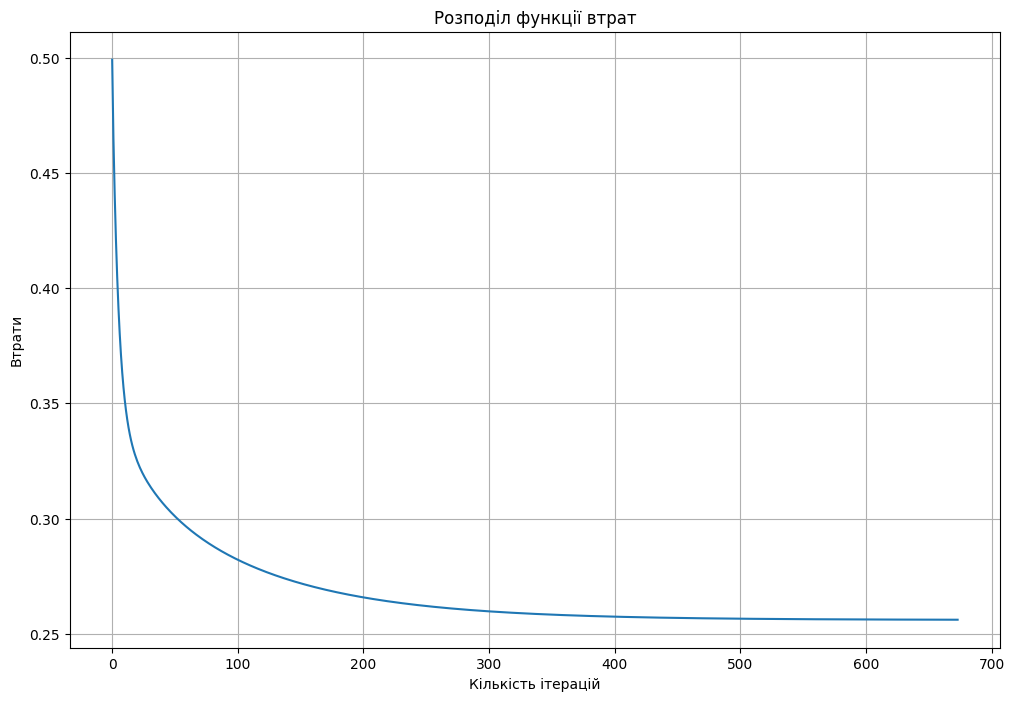

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss)
plt.title('Розподіл функції втрат')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Втрати')
plt.grid()

Обрахунок коефіцієнтів за допомогою модулю sklearn

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [ ]:
X = np.array(X_matrix[['area', 'bedrooms', 'bathrooms']])
Y = np.array(price)

In [ ]:
model.fit(X, Y)

LinearRegression()

In [ ]:
model.coef_

array([0.43945209, 0.21749969, 0.74102873])

In [ ]:
model.intercept_

-1.5980562168290113

Коефіцієнти знайдені за допомогою градієнтного спуску:


1.   w_0 = -1.5354088401646424
2.   w_1 = 0.44230619638851987
3.   w_2 = 0.20150010348132238
4.   w_3 = 0.7315462893332763

Коефіцієнти знайдені за допомогою модулю sklearn:


1.   w_0 = -1.5980562168290113
2.   w_1 = 0.43945209
3.   w_2 = 0.21749969
4.   w_3 = 0.74102873

In [ ]:
model.n_features_in_

4

Аналітичний метод

In [ ]:
X_np_matrix = np.array(X_matrix)

In [ ]:
XT_X = np.dot(X_np_matrix.T, X_np_matrix)

In [ ]:
XT_X_inv = np.linalg.inv(XT_X)

In [ ]:
XT_X_inv_XT = np.dot(XT_X_inv, X_np_matrix.T)

In [ ]:
np.dot(XT_X_inv_XT, price)

array([ 0.43945209,  0.21749969,  0.74102873, -1.59805622])

Коефіцієнти знайдені за допомогою градієнтного спуску:

1.   w_0 = -1.5354088401646424
2.   w_1 = 0.44230619638851987
3.   w_2 = 0.20150010348132238
4.   w_3 = 0.7315462893332763


Коефіцієнти знайдені за допомогою модулю sklearn:

1.   w_0 = -1.5980562168290113
2.   w_1 = 0.43945209
3.   w_2 = 0.21749969
4.   w_3 = 0.74102873


Коефіцієнти знайдені за допомогою аналітичного методу:

1.   w_0 = -1.59805622
2.   w_1 = 0.43945209
3.   w_2 = 0.21749969
4.   w_3 = 0.74102873